# Microsoft wants to make a Big Film


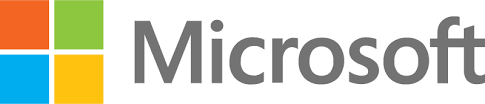

## Overview
This project focus on analyzing certain factor such as revenue,genres,rating et for making a successful movie .It helps in finding the type of movies that people like to watch.Microsoft team could use these analyses for their new beginging in the film industry.It would help them in creating a successful film.

## Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies.I have made analysis to find the type of movie to make in order to be successful. 

## Data Understanding:

In [1]:
# import all the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import warnings




Now we need to load the needed csv data files for the movie analysis from the folder named "zippeddata folder"

In [2]:
# use pandas to load the csv file and store it as dataframe
title = pd.read_csv('zippeddata/imdb.title.basics.csv.gz')
rating = pd.read_csv('zippeddata/imdb.title.ratings.csv.gz')
budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [3]:
title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


#### Budget Data:

The budget data has 'foreign gross','production_budget' and 'worldwide_gross' in type integer.We need to convert it into a float and the 'release_date is in object.It has to be converted to datetime object.Before that let us check for any unnecessary characters.

In [6]:
budget['production_budget']

0       $425,000,000
1       $410,600,000
2       $350,000,000
3       $330,600,000
4       $317,000,000
            ...     
5777          $7,000
5778          $6,000
5779          $5,000
5780          $1,400
5781          $1,100
Name: production_budget, Length: 5782, dtype: object

In [7]:
# Remove separator using replace function
budget['production_budget'].str.replace(',', '')

0       $425000000
1       $410600000
2       $350000000
3       $330600000
4       $317000000
           ...    
5777         $7000
5778         $6000
5779         $5000
5780         $1400
5781         $1100
Name: production_budget, Length: 5782, dtype: object

In [8]:
# Remove the $ symbol using split fuction
budget['production_budget'].str.replace(',', '').str.split('$')

0       [, 425000000]
1       [, 410600000]
2       [, 350000000]
3       [, 330600000]
4       [, 317000000]
            ...      
5777         [, 7000]
5778         [, 6000]
5779         [, 5000]
5780         [, 1400]
5781         [, 1100]
Name: production_budget, Length: 5782, dtype: object

In [9]:
# Select the needed value by using lambda function
budget['production_budget'].str.replace(',', '').str.split('$').map(lambda x:x[1])

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: production_budget, Length: 5782, dtype: object

In [10]:
# store the result 
budget['production_budget'] = budget['production_budget'].str.replace(',', '').str.split('$').map(lambda x:x[1])

In [11]:
# Check for the float values
budget['production_budget'].str.contains('.').sum()

5782

In [12]:
# convert to float
budget['production_budget'] = budget['production_budget'].astype(float)

In [13]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 271.2+ KB


Same is repeated for 'domestic_gross' and 'worldwide_gross'

In [14]:
budget['domestic_gross'] = budget['domestic_gross'].str.replace(',', '').str.split('$').map(lambda x:x[1])

In [15]:
budget['domestic_gross'] = budget['domestic_gross'].astype(float)

In [16]:
budget['worldwide_gross'].str.replace(',', '').str.split('$').map(lambda x:x[1])

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: object

In [17]:
budget['worldwide_gross'] = budget['worldwide_gross'].str.replace(',', '').str.split('$').map(lambda x:x[1])

In [18]:
budget['worldwide_gross'] = budget['worldwide_gross'].astype(float)

In [19]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [20]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [21]:
# convert 'release_date' to datetime object.
budget['release_date'] = pd.to_datetime(budget['release_date'])

In [22]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [23]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [24]:
# reset the index to datetime format to geth the month and year in separate column.
budget.index = pd.to_datetime(budget.index)

In [25]:
# create 'month' column
budget['month'] = budget['release_date'].dt.month

In [26]:
# craete 'year'column
budget['year'] = budget['release_date'].dt.year

In [27]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
1970-01-01 00:00:00.000000000,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,2009
1970-01-01 00:00:00.000000001,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011
1970-01-01 00:00:00.000000002,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019
1970-01-01 00:00:00.000000003,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015
1970-01-01 00:00:00.000000004,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,2017


### Data Cleaning:

We need to clean the data before performing analysis . I checked for the null values and dropped unnecessary columns to get better output.

In [28]:
title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Columns 'runtime_minutes'and 'genres contains null values.

In [29]:
# checking for the sum of null values
title['runtime_minutes'].isna().sum()

31739

In [30]:
# checking for the average number of null vales
title['runtime_minutes'].isna().sum() / len(title)

0.21717620976571053

My analysis is based on genre and runtime. I can't keep null values as it hinders my analysis.Hence dropping it.

In [31]:
# title['runtime_minutes']=title['runtime_minutes'].fillna(0)
title.dropna(subset = ['runtime_minutes'], axis = 0, inplace = True)

In [32]:
title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114405 entries, 0 to 146142
Data columns (total 6 columns):
tconst             114405 non-null object
primary_title      114405 non-null object
original_title     114401 non-null object
start_year         114405 non-null int64
runtime_minutes    114405 non-null float64
genres             112233 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.1+ MB


In [33]:
# checking for the null values in 'genre' column
title['genres'].isna().sum()

2172

In [34]:
title['genres'].isna().sum() / len(title)

0.01898518421397666

In [35]:
# since it has few null values,I am dropping the rows .
title.dropna(subset = ['genres'], axis = 0, inplace = True)

In [36]:
title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112233 entries, 0 to 146139
Data columns (total 6 columns):
tconst             112233 non-null object
primary_title      112233 non-null object
original_title     112232 non-null object
start_year         112233 non-null int64
runtime_minutes    112233 non-null float64
genres             112233 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


### Dataset Merging :

Before merging the data,We need to check for the duplicates.

In [37]:
title[title.duplicated(subset = ['primary_title'], keep = False)].sort_values(by = 'primary_title').iloc[20:30]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
34872,tt2289132,1915,1915,2013,5.0,"Documentary,Drama"
14385,tt1714820,1960,1960,2010,75.0,Documentary
55595,tt3255186,1960,1960,2013,66.0,"Biography,Documentary"
110755,tt6461678,1971,1971,2011,215.0,Documentary
60011,tt3478510,1971,1971,2014,79.0,"Documentary,History,Thriller"
38738,tt2388621,1982,1982,2013,90.0,Drama
97230,tt5671400,1982,1982,2015,11.0,Documentary
101489,tt5932546,1985,1985,2016,114.0,"Adventure,Comedy,Drama"
109086,tt6411590,1985,1985,2018,85.0,Drama
65431,tt3735338,1989,1989,2014,54.0,Documentary


There are movies with same title released on different years.

In [38]:
# checking for the title with year column
title[title.duplicated(subset = ['primary_title', 'start_year'],keep = False)].sort_values(by = 'primary_title').iloc[20:30]


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
105408,tt6160528,88,88,2016,103.0,Documentary
114899,tt6804666,8:30,8:30,2017,70.0,Mystery
86522,tt5017134,8:30,8:30,2017,70.0,Mystery
31052,tt2180277,90 Minutes,90 minutter,2012,88.0,Drama
51474,tt3054786,90 Minutes,90 Minutes,2012,94.0,Thriller
105960,tt6200522,A Ballad of Maladies,A Ballad of Maladies,2016,86.0,"Documentary,History,Music"
104657,tt6119224,A Ballad of Maladies,A Ballad of Maladies,2016,86.0,"Documentary,Music"
9344,tt1554091,A Better Life,A Better Life,2011,98.0,"Drama,Romance"
25786,tt2027265,A Better Life,Une vie meilleure,2011,110.0,Drama
142558,tt9387380,A Christmas Carol,A Christmas Carol,2018,121.0,"Drama,Family,Musical"


There are movies having same name and release year but different runtime.

In [39]:
title[title.duplicated(subset = ['primary_title','start_year','runtime_minutes'], keep = False)].sort_values(by = 'primary_title')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
145118,tt9773302,3. Elma,3. Elma,2014,65.0,Drama
144392,tt9660588,3. Elma,3. Elma,2014,65.0,Drama
144337,tt9653930,3. Elma,3. Elma,2014,65.0,Drama
86522,tt5017134,8:30,8:30,2017,70.0,Mystery
114899,tt6804666,8:30,8:30,2017,70.0,Mystery
...,...,...,...,...,...,...
66989,tt3815122,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66993,tt3815130,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66992,tt3815128,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66991,tt3815126,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"


In [40]:
# removing duplicates having same title,year and runtime
title.drop_duplicates(subset = ['primary_title','start_year','runtime_minutes'], inplace = True)

In [41]:
# checking for merging conflict between 'title' and 'gross' dataframe.
title[title['primary_title'] == 'Abduction']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
10471,tt1600195,Abduction,Abduction,2011,106.0,"Action,Mystery,Thriller"
40541,tt2447982,Abduction,Abduction,2011,84.0,"Horror,Thriller"
101693,tt5943940,Abduction,Abduction,2017,90.0,"Action,Comedy,Drama"
128101,tt7867360,Abduction,Abduction,2019,106.0,"Action,Sci-Fi"


In [42]:
budget[budget['movie'] == 'Abduction']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
1970-01-01 00:00:00.000001695,96,2011-09-23,Abduction,35000000.0,28087155.0,86648359.0,9,2011


From the above checks,there are same movie released on same year having different runtime.But we cannot find which budget is for the particular runtime.Hence I am not deleting the duplicates.

The dataframe 'title' and 'rating' as a unique id 'tconst'.I am merging the two dataframe on 'tconst' using inner joint.If I use left or outer join then it would give me null values in genres as 'rating' dataframe has no genres columns. 

In [43]:
# Merging the dataframe and assigning it to the variable 'df'
df = title.merge(rating, on = 'tconst',how = 'inner')

In [44]:
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65696 entries, 0 to 65695
Data columns (total 8 columns):
tconst             65696 non-null object
primary_title      65696 non-null object
original_title     65696 non-null object
start_year         65696 non-null int64
runtime_minutes    65696 non-null float64
genres             65696 non-null object
averagerating      65696 non-null float64
numvotes           65696 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


Now I would like to merge the dataframe 'df' with 'budget'.They share the common column name 'movie' and 'year'. Hence checking for any duplicates beforing merging the dataframe using

In [46]:
# renaming the column name of 'df' dataframe to match with 'gross' dataframe for merging 
df.rename(columns = {'primary_title':'movie', 'start_year':'year'}, inplace = True)

In [47]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5782 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000005781
Data columns (total 8 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
month                5782 non-null int64
year                 5782 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 406.5+ KB


In [48]:
# merging 'df' and 'gross' using left joint on 'title' and 'year' columns
movie_analysis_df = pd.merge(df, budget, on = ['movie', 'year'], how = 'left')

In [49]:
movie_analysis_df.head()

,tconst,movie,original_title,year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,month
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,NaN,NaT,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,NaN,NaT,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,NaN,NaT,NaN,NaN,NaN,NaN
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,NaN,NaT,NaN,NaN,NaN,NaN
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,NaN,NaT,NaN,NaN,NaN,NaN


In [50]:
# removing original title as it contains same title in different language for some movies.
movie_analysis_df.drop('original_title', axis = 1, inplace = True)

In [51]:
movie_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65696 entries, 0 to 65695
Data columns (total 13 columns):
tconst               65696 non-null object
movie                65696 non-null object
year                 65696 non-null int64
runtime_minutes      65696 non-null float64
genres               65696 non-null object
averagerating        65696 non-null float64
numvotes             65696 non-null int64
id                   1488 non-null float64
release_date         1488 non-null datetime64[ns]
production_budget    1488 non-null float64
domestic_gross       1488 non-null float64
worldwide_gross      1488 non-null float64
month                1488 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(3)
memory usage: 7.0+ MB


### Analysis

I made my analysis on three question.

  * What type of movie did people watch or rate in the past years.
  * Does movie length have any impact on audience.
  * When is the best time to release the movie in order to be successful.

In [52]:
movie_analysis_df.head()

,tconst,movie,year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,month
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,NaN,NaT,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,NaN,NaT,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,NaN,NaT,NaN,NaN,NaN,NaN
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,NaN,NaT,NaN,NaN,NaN,NaN
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,NaN,NaT,NaN,NaN,NaN,NaN


In [53]:
# genre column needs to be formatted in order to start analysis on genre
genres_list = df['genres'].str.split(',')

In [54]:
# creating empty list to add all genres
categories = []
for category in genres_list:
    for n in category:
        categories.append(n)

In [55]:
genres_list

0                [Action, Crime, Drama]
1                    [Biography, Drama]
2                               [Drama]
3              [Comedy, Drama, Fantasy]
4        [Adventure, Animation, Comedy]
                      ...              
65691                           [Drama]
65692                     [Documentary]
65693                     [Documentary]
65694                   [Drama, Family]
65695                     [Documentary]
Name: genres, Length: 65696, dtype: object

In [56]:
categories[1:5]

['Crime', 'Drama', 'Biography', 'Drama']

In [57]:
# removing the duplicates by converting to 'set' 
genres_list_data = list(set(categories))

In [58]:
genres_list_data

['Musical',
 'Fantasy',
 'Documentary',
 'Crime',
 'Short',
 'Drama',
 'Western',
 'War',
 'Family',
 'Thriller',
 'Romance',
 'News',
 'Action',
 'History',
 'Game-Show',
 'Adult',
 'Music',
 'Biography',
 'Adventure',
 'Reality-TV',
 'Comedy',
 'Animation',
 'Sci-Fi',
 'Horror',
 'Sport',
 'Mystery']

In [59]:
genres_list_data = sorted(genres_list_data)

In [60]:
genres_list_data

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [61]:
# creating a genre dataframe
df_genres = pd.DataFrame(genres_list)

In [62]:
df_genres

,genres
0,"[Action, Crime, Drama]"
1,"[Biography, Drama]"
2,[Drama]
3,"[Comedy, Drama, Fantasy]"
4,"[Adventure, Animation, Comedy]"
...,...
65691,[Drama]
65692,[Documentary]
65693,[Documentary]
65694,"[Drama, Family]"


In [63]:
# passin value '0' to all the columns in 'df_genres' dataframe
for value in genres_list_data:
    df_genres[value] = 0

In [64]:
df_genres.head()

,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,"[Action, Crime, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Biography, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[Drama],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama, Fantasy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[Adventure, Animation, Comedy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# code to remove warning notification.
warnings.filterwarnings("ignore")
# adding 1 to columns which is present in genre category.
for value in df_genres.index:
    for genre in genres_list_data:
        if genre in df_genres['genres'][value]:
            df_genres[genre][value] = 1

In [ ]:
df_genres.head()

Now I am merging this 'df_genres' with our 'movie_analysis_df' on index

In [ ]:
movie_df = pd.merge(movie_analysis_df, df_genres, left_index = True, right_index = True)


In [ ]:
movie_df.head()

In [ ]:
movie_df.columns

In [ ]:
# removing columns that are not needeed.
movie_df = movie_df.drop(['numvotes', 'id', 'release_date', 'genres_y'], axis = 1)

In [ ]:
movie_df.info()

In [ ]:
# Since my analysis is to find the type of movie with high rating over past 10 years,I am taking only the high rating data
max_rating_df = movie_df[movie_df['averagerating'] > 7.0] 

In [ ]:
movie_df.head()

In [ ]:
# selecting all genre columns
max_rating_df.iloc[:,10:]

In [ ]:
# sum up those genre values
max_rating_df.iloc[:,10:].sum()

In [ ]:
# sort the number of movies with high ratings
max_rating_df.iloc[:, 10:].sum().sort_values(ascending = False)

In [ ]:
# select top 5 values
max_rating_df.iloc[:, 10:].sum().sort_values(ascending = False).head(5)

In [ ]:
# storing those index values with new variable.
genres_max_rating = max_rating_df.iloc[:, 10:].sum().sort_values(ascending = False).head(5).index.values

In [ ]:
genres_max_rating

I am grouping the data with year to get the high rated genres for last 10 years

In [ ]:
# selecting dataframe from 'year' column
max_rating_df.iloc[:, 2:]


In [ ]:
# group by 'year' and add the values
max_rating_df.iloc[:, 2:].groupby(by = 'year').sum()

In [ ]:
# selecting only the top 5 genres based on year and year 2018 and 2019  doestnot have enough data.hence selecting till 2017.
genre_year = max_rating_df.iloc[:, 2:].groupby(by = 'year').sum().loc['2010':'2017',genres_max_rating]

In [ ]:
genre_year

In [ ]:
# Create Plot
ax=genre_year.plot(figsize = (10,10), title = 'Genres with High Rating over the past 10 years', legend = True)
# set title for x-axis
ax.set_xlabel("Movie Release Year")
# set title for y-axis
ax.set_ylabel("Number of Movies in top_5 genres")
# placing the legend to avoid overlap
plt.legend(loc="upper left")
plt.savefig("./images/genre_analysis.png")
plt.show()

#### Analysis on Movie Runtime

In [ ]:
movie_df['runtime_minutes'].describe()

In [ ]:
# runtime_minutes contains outliers so let us check using box plot
# create a boxplot for 'runtime_minutes column'
plt.boxplot(movie_df['runtime_minutes'])
# set title
plt.title('Finding Outliers in Movie Runtime Data')
# set x label
plt.xlabel('Outliers')
# set y label
plt.ylabel('Number of minutes')

plt.savefig("./images/boxplot.png")

plt.show()

Since runtime_minutes column contains outliers, I am categorizing into short,average and long movies based on run time and check the ratings for each category.

In [ ]:
# This function takes in dataframe and returns the different length plots
def movie_runtime_plot(dataframe):
    ''' This function takes in a dataframe to
        categorize runtime based on minutes.
        
        If runtime is 40 mins to 70 mins -short
        if runtime is 70 mins to 120 mins -average
        if runtime is 120 mins to 300 mins- long'''
    # create subplot    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11, 6))
    #  setting title,x and y axis label for subplot 1   
    axes[0].set_title('Short Movie \n (40minutes-80 minutes)')
    axes[0].set_ylabel('Number of Movies')
    axes[0].set_xlabel('Lenght of the movie in minutes')
    
    #  setting title,x and y axis label for subplot 2    
    axes[1].set_title('Average Movie \n (80minutes-120 minutes)')
    axes[1].set_ylabel('Number of Movies')
    axes[1].set_xlabel('Lenght of the movie in minutes')
    
    #  setting title,x and y axis label for subplot 1  
    axes[2].set_title('Long Movie \n (120minutes-300minutes)')
    axes[2].set_ylabel('Number of Movies')
    axes[2].set_xlabel('Lenght of the movie in minutes')
    
    #  setting limits for short length movies   
    short_movie=dataframe['runtime_minutes'][(dataframe['runtime_minutes']>40)&(dataframe['runtime_minutes']<70)]
    #  setting limits for average length movies     
    average_movie=dataframe['runtime_minutes'][(dataframe['runtime_minutes']>70)&(dataframe['runtime_minutes']<120)]
    #  setting limits for long length movies 
    long_movie=dataframe['runtime_minutes'][(dataframe['runtime_minutes']>120)&(dataframe['runtime_minutes']<300)]
    
    axes[0].hist(short_movie, bins = 30)
    axes[1].hist(average_movie, bins = 30)
    axes[2].hist(long_movie, bins = 30)
    # give space between plots to avoid overlap    
    fig.tight_layout(pad = 3.0)
    plt.savefig("./images/runtime_length.png")
    return plt.show()

In [ ]:
movie_runtime_plot(movie_df)

In [ ]:
# filtering movie length between 40 to 300 and storing in new variable 'runtime_df'
runtime_df = movie_df[(movie_df['runtime_minutes'] > 40) & (movie_df['runtime_minutes'] < 300)]

In [ ]:
# selecting column 'runtime_minutes','genres' and 'averagerating' and groupby 'averagerating'
runtime_df[['averagerating', 'runtime_minutes']].groupby(by = 'averagerating')



In [ ]:
# finding average runtime for particular rating and sort in Descending order.
runtime_df[['averagerating', 'runtime_minutes']].groupby(by = 'averagerating').mean().sort_values(by = 'averagerating', ascending = False)

In [ ]:
# selecting the top 30 rating
top_30 = runtime_df[['averagerating', 'runtime_minutes']].groupby(by = 'averagerating').mean().sort_values(by = 'averagerating', ascending = False).head(30)


In [ ]:
# Plot bar graph for the top 30 ratings.
ax = top_30.plot(kind = 'bar', figsize = (10, 10), title = 'High rating based on movie runtime', legend = True)
# set title for x-axis
ax.set_xlabel("Top_Ratings")
# set title for y-axis
ax.set_ylabel("Average Runtime in minutes")
# placing the legend to avoid overlap
plt.legend(loc = "upper left")
plt.savefig("./images/top_30.png")
plt.show()

In [ ]:
# selecting the low 30 rating
least_30 = runtime_df[['averagerating', 'runtime_minutes']].groupby(by = 'averagerating').mean().sort_values(by = 'averagerating', ascending = True).head(30)

In [ ]:
# Plot bar graph for the least 30 ratings.
ax = least_30.plot(kind = 'bar',figsize = (10,10),title = 'Low rating based on movie runtime', legend = True)
# set title for x-axis
ax.set_xlabel("Low_Ratings")
# set title for y-axis
ax.set_ylabel("Average Runtime in minutes")
# placing the legend to avoid overlap
plt.legend(loc = "upper left")
plt.savefig("./images/least_30.png")
plt.show()

#### Domestic Gross Analysis

In [ ]:
movie_df.info()

In [ ]:
# Our analysis is on gross value .hence removing null values.
gross_analysis_df = movie_df.dropna(subset = ['domestic_gross'], axis = 0)

In [ ]:
gross_analysis_df.head()

In [ ]:
gross_analysis_df['domestic_gross'].describe()

In [ ]:
gross_analysis_df['month'].nunique()

In [ ]:
gross_analysis_df.info()

In [ ]:
# selecting average domestic gross based on months.
month_df = gross_analysis_df[['domestic_gross', 'month']].groupby(by = 'month').mean()
month_df

In [ ]:
# create bar plot and set figure size.
ax = month_df.plot(kind = 'bar', figsize = (10, 8))
# set x label
ax.set_xlabel('Months')
# set y label
ax.set_ylabel('Avg Domestic Gross Value in Millions')
# modifying the x label from numbers to name of the month.
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# using ticker library to display dollar value in y axis
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
# plt.savefig("./images/month_analysis.png")
plt.show()

## Conclusion:

This project gives us three valuable findings.
* Which genre to select for making a movie - As you can see that people have given high rating to 'Documentary'movies in the year 2010-2017. It gives us a clear picture that people like to watch Documentary movies compared to other genres.
* Does length of the movie have any impact ion the audience - From our analysis,most of the movies fall under the average runtime of 90 minutes but people have rated equally for any type of movie length which helps us in finding the movie run time has no impact on the viewers point. 
* Which is the best time to release the movie to become successful -It looks like movie released in the month of 'May' and 'July' have made highest average domestic revenue.It could be of many factors like weather,holiday season etc.Releasing movie at this time would make a big success.

## Next Step:

There are futher more analysis that can be made for creating a successful movie.
* Need to focus on the budget whether high budget leads to high people rating and profit.
* Need more analysis on the crew of which director and actor have given a successful movie in their career.
* Need to look for more data on current trends and does rating is just a number or its a true outcome from viewers point of view.

## For More Information:


See the full analysis in the Jupyter Notebook or review this presentation.